# Pymatgen data collection

_Authors: Enze Chen and Mark Asta (University of California, Berkeley)_

## Import Python packages

In [65]:
import os
import requests

import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
%matplotlib inline

from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
from pymatgen.core.composition import Composition
from pymatgen.core.structure import Structure
from pymatgen.entries.compatibility import MaterialsProjectCompatibility

## API key

In [27]:
# get API key
api_key = None
try:
    api_key = os.environ['MAPI_KEY']
except:
    with open('../../files/mp_api_key.txt', 'r') as f:
        api_key = f.readlines[1].strip()

# assert helps catch potential bugs
assert api_key is not None, 'API key not set correctly in environment!'
assert api_key != '', 'API key not found in mp_api_key.txt file!'

## Supported properties

In [57]:
with MPRester(api_key=api_key) as mpr:
    print(mpr.supported_properties)

('energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard', 'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible', 'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids', 'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags', 'elasticity')


## Built-in convex hull plotter

In [ ]:
with MPRester(api_key=api_key) as mpr:
    entries = mpr.get_entries_in_chemsys(['Al', 'Ni'])

pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show()

## My own convex hull plotter

In [121]:
def get_fractions(entries):
    fractions = []
    for e in entries:
        split = e['pretty_formula'].split('Ni')
        if split[1] == '':
            n_Ni = 1
        else:
            n_Ni = int(split[1])
            
        s2 = split[0].split('Al')
        if s2[1] == '':
            n_Al = 1
        else:
            n_Al = int(s2[1])
            
        fractions.append(n_Al / (n_Ni + n_Al))
    return fractions

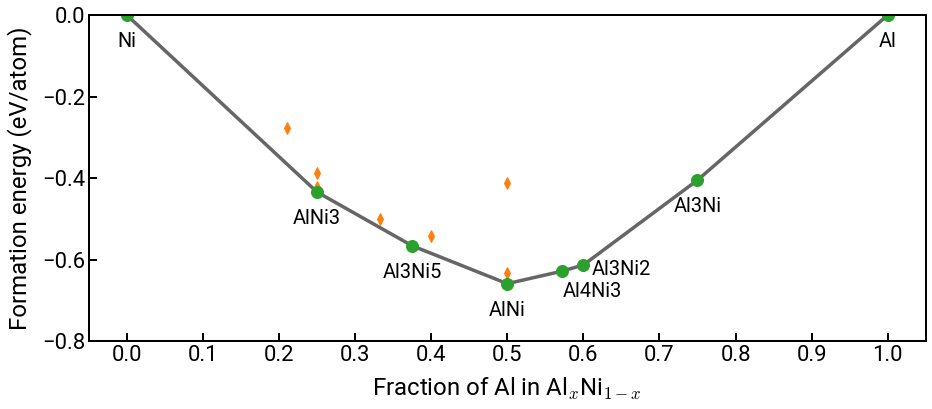

In [241]:
# props = ['formation_energy_per_atom', 'pretty_formula', 'e_above_hull']
# with MPRester(api_key=api_key) as mpr:
#     entries = mpr.query({'elements':['Al', 'Ni']}, props)
# # display(entries)
    
# fracs = get_fractions(entries)
# inds = np.argsort(fracs)
# fracs = sorted(fracs)
# fracs.insert(0, 0)
# fracs.append(1)
# entries_sorted = [entries[i] for i in inds]
# entries_sorted.insert(0, {'formation_energy_per_atom':0.0, 'pretty_formula':'Ni', 'e_above_hull':0.0})
# entries_sorted.append({'formation_energy_per_atom':0.0, 'pretty_formula':'Al', 'e_above_hull':0.0})
# entries_sorted

# points = []
# for i in range(len(fracs)):
#     points.append([fracs[i], entries_sorted[i]['formation_energy_per_atom']])
    
# points = np.array(points)
# hull = ConvexHull(points)

plt.rcParams.update({'figure.figsize':(15,6)})
fig, ax = plt.subplots()
ax.plot(points[:, 0], points[:, 1], 'd', ms=8, c='C1')

for i, simplex in enumerate(hull.simplices):
    if i > 0:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k', lw=3.5, alpha=0.6)
        
for i, e in enumerate(entries_sorted):
    if e['e_above_hull'] < 0.01:
        ax.plot(points[i, 0], points[i, 1], 'o', c='C2')
        if points[i, 0] == 0.6:
            ax.text(points[i, 0] + 0.05, points[i, 1] - 0.01, e['pretty_formula'], va='center', ha='center', size=20)
        elif points[i, 0] == 4/7:
            ax.text(points[i, 0] + 0.04, points[i, 1] - 0.05, e['pretty_formula'], va='center', ha='center', size=20)
        else:
            ax.text(points[i, 0], points[i, 1] - 0.065, e['pretty_formula'], va='center', ha='center', size=20)

ax.set_xlabel('Fraction of Al in Al$_{x}$Ni$_{1-x}$')
ax.set_ylabel('Formation energy (eV/atom)')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.8, 0])
ax.set_xticks(np.linspace(0, 1, 11))
plt.show()
fig.savefig('../week_1/02/convex_hull_NiAl.png', dpi=300, bbox_inches='tight')

In [210]:
props = ['formation_energy_per_atom', 'pretty_formula', 'e_above_hull']
with MPRester(api_key=api_key) as mpr:
    entries = mpr.query({'nelements':1, 'e_above_hull':{'$lt':0.001}}, props)

In [212]:
entries.sort(key=lambda x: x['e_above_hull'])
entries.sort(key=lambda x: x['pretty_formula'])
len(entries)
entries

[{'formation_energy_per_atom': 0.0, 'pretty_formula': 'Ac', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Ag', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Al', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Ar', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.00043104000000000753,
  'pretty_formula': 'Ar',
  'e_above_hull': 0.00043104000000000753},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'As', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Au', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'B', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Ba', 'e_above_hull': 0},
 {'formation_energy_per_atom': 7.114499999993917e-05,
  'pretty_formula': 'Ba',
  'e_above_hull': 7.114499999993917e-05},
 {'formation_energy_per_atom': 0.0, 'pretty_formula': 'Be', 'e_above_hull': 0},
 {'formation_energy_per_atom': 0.0,

## Example of requests access

In [231]:
# from mapidoc https://github.com/materialsproject/mapidoc
# import json
# import requests

# data = {
#     'criteria': {
#         'elements': {'$in': ['Li', 'Na', 'K'], '$all': ['O']},
#         'nelements': 2,
#     },
#     'properties': [
#         'formula',
#         'formation_energy_per_atom',
#     ]
# }
# r = requests.post('https://materialsproject.org/rest/v2/query',
#                  headers={'X-API-KEY': '<YOUR-API-KEY>'},
#                  data={k: json.dumps(v) for k,v in data.items()})
# response_content = r.json() # a dict

url = 'https://www.materialsproject.org/rest/v2/materials/Fe4O6/vasp'
data = requests.get(url, {'API_KEY':api_key})
data.text

'{"response": [{"energy": -516.78134568, "energy_per_atom": -6.459766821, "volume": 982.2523359429204, "formation_energy_per_atom": -1.4175868379999996, "nsites": 80, "unit_cell_formula": {"Fe": 32.0, "O": 48.0}, "pretty_formula": "Fe2O3", "is_hubbard": true, "elements": ["Fe", "O"], "nelements": 2, "e_above_hull": 0.28950961900000394, "hubbards": {"Fe": 5.3, "O": 0.0}, "is_compatible": true, "spacegroup": {"symprec": 0.1, "source": "spglib", "symbol": "P1", "number": 1, "point_group": "1", "crystal_system": "triclinic", "hall": "P 1"}, "task_ids": ["mp-1244869", "mp-1844496"], "band_gap": 0.22019999999999995, "density": 4.319354363385391, "icsd_id": null, "icsd_ids": [], "cif": "# generated using pymatgen\\ndata_Fe2O3\\n_symmetry_space_group_name_H-M   \'P 1\'\\n_cell_length_a   10.65193596\\n_cell_length_b   9.69261434\\n_cell_length_c   9.52475547\\n_cell_angle_alpha   87.46853296\\n_cell_angle_beta   89.30300677\\n_cell_angle_gamma   89.15374467\\n_symmetry_Int_Tables_number   1\\n

In [225]:
import json
import pprint
foo = json.loads(data.text)
print(len(foo['response']))
for f in foo['response']:
    print(f['full_formula'])

25
Fe32O48
Fe64O96
Fe8O12
Fe32O48
Fe4O6
Fe32O48
Fe12O18
Fe16O24
Fe2O3
Fe8O12
Fe16O24
Fe32O48
Fe32O48
Fe16O24
Fe8O12
Fe64O96
Fe4O6
Fe16O24
Fe16O24
Fe8O12
Fe32O48
Fe32O48
Fe12O18
Fe16O24
Fe4O6
